## Data Analysis


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [112]:
df=pd.read_csv(r"C:\Users\IVANN\Downloads\archive (2)\vgsales.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# Data Cleaning

In [114]:
df[df.duplicated(keep=False)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [134]:
df['Year']=df['Year'].astype('Int64')
df['Year'].dtypes

Int64Dtype()

In [152]:
df['Year']=df['Year'].astype(object)
df['Year'].dtypes

dtype('O')

In [154]:
df['Year'].value_counts()

Year
2007    1473
2009    1431
2008    1428
2010    1259
2011    1139
2006    1008
2005     941
2002     829
2003     775
2004     763
2012     657
2015     614
2014     582
2013     546
2001     482
1998     379
2000     349
2016     344
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
2017       3
2020       1
Name: count, dtype: int64

In [116]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [156]:
np.mean(df['Year'])

2006.416134474033

In [158]:
df['Year'].median()

2007.0

In [162]:
fill = {'Publisher':'Unknown','Year': 2007}
df.fillna(fill, inplace=True)

In [193]:
df.sample()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
10169,10171,Guitar Rock Tour,DS,2007,Misc,Gameloft,0.1,0.0,0.0,0.01,0.11


In [166]:
for col in df.columns: 
    print(col)
    print(df[col].unique())
    print('=' * 50)

Rank
[    1     2     3 ... 16598 16599 16600]
Name
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ... 'Plushees'
 'Woody Woodpecker in Crazy Castle 5' 'Know How 2']
Platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Year
[2006 1985 2008 2009 1996 1989 1984 2005 1999 2007 2010 2013 2004 1990
 1988 2002 2001 2011 1998 2015 2012 2014 1992 1997 1993 1994 1982 2003
 1986 2000 1995 2016 1991 1981 1987 1980 1983 2020 2017]
Genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
Publisher
['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Eur

# Exploration

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, '1980'),
  Text(1, 0, '1981'),
  Text(2, 0, '1982'),
  Text(3, 0, '1983'),
  Text(4, 0, '1984'),
  Text(5, 0, '1985'),
  Text(6, 0, '1986'),
  Text(7, 0, '1987'),
  Text(8, 0, '1988'),
  Text(9, 0, '1989'),
  Text(10, 0, '1990'),
  Text(11, 0, '1991'),
  Text(12, 0, '1992'),
  Text(13, 0, '1993'),
  Text(14, 0, '1994'),
  Text(15, 0, '1995'),
  Text(16, 0, '1996'),
  Text(17, 0, '1997'),
  Text(18, 0, '1998'),
  Text(19, 0, '1999'),
  Text(20, 0, '2000'),
  Text(21, 0, '2001'),
  Text(22, 0, '2002'),
  Text(23, 0, '2003'),
  Text(24, 0, '2004'),
  Text(25, 0, '2005'),
  Text(26, 0, '2006'),
  Text(27, 0, '2007'),
  Text(28, 0, '2008'),
  Text(29, 0, '2009'),
  Text(30, 0, '2010'),
  Text(31, 0, '2011'),
  Text(32, 0, '2012'),
  Text(33, 0, '2013'),
  T

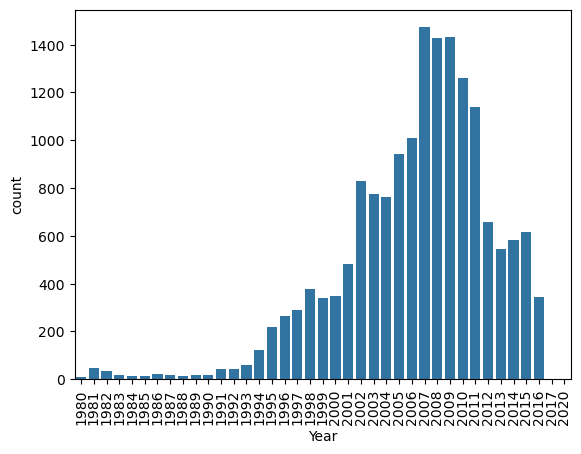

In [168]:
sns.countplot(x=df['Year'])
plt.xticks(rotation=90)

In [174]:
numeric_df=df.corr(numeric_only=True)
numeric_df

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.177526,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.177526,1.000000,-0.091282,0.005824,-0.169432,0.040857,-0.074807
NA_Sales,-0.401362,-0.091282,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.005824,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169432,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.040857,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074807,0.941047,0.902836,0.611816,0.748331,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

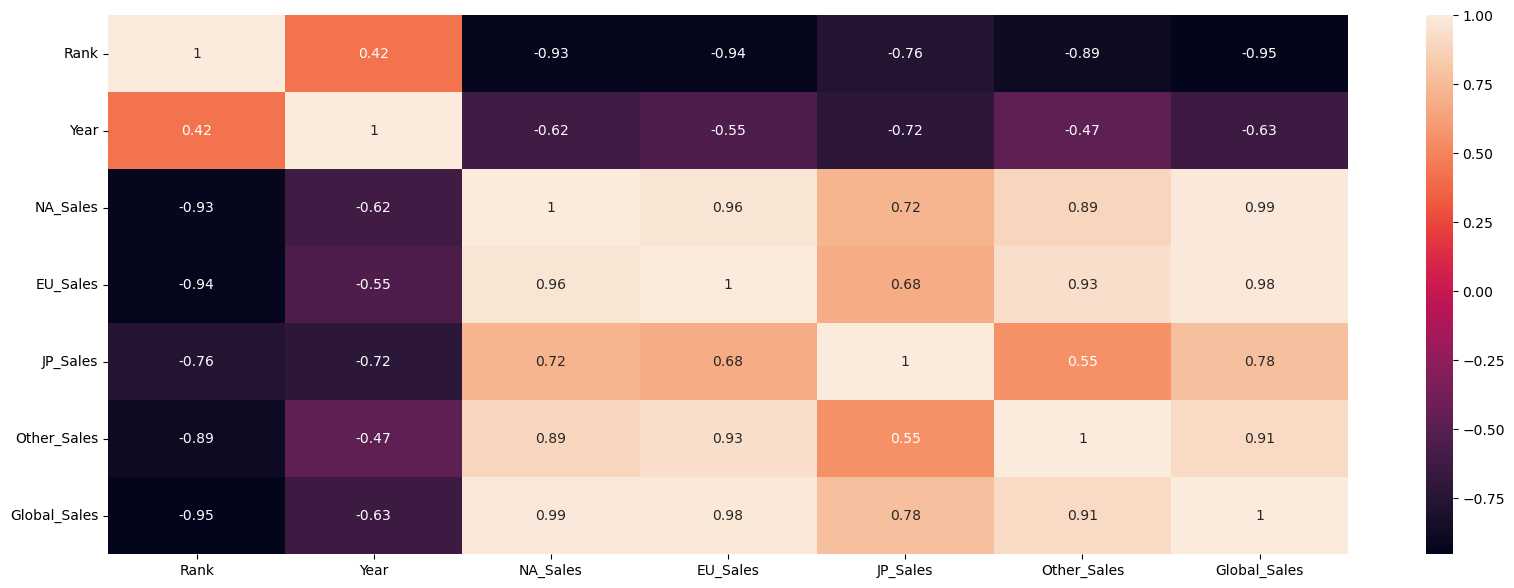

In [190]:
sns.heatmap(numeric_df.corr(), annot =True)

plt.rcParams['figure.figsize'] = (20,10)
plt.show

In [197]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [199]:
df.set_index('Platform')

,Rank,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,,,,,,
Wii,1,Wii Sports,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
NES,2,Super Mario Bros.,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
Wii,3,Mario Kart Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
Wii,4,Wii Sports Resort,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
GB,5,Pokemon Red/Pokemon Blue,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
GBA,16596,Woody Woodpecker in Crazy Castle 5,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
GC,16597,Men in Black II: Alien Escape,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
PS2,16598,SCORE International Baja 1000: The Official Game,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [205]:
df.reset_index()

,index,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [385]:
df_plat = df.groupby(['Platform'],as_index=False)['Name'].count().sort_values(by='Name',ascending=False)
df_plat


,Platform,Name
4,DS,2163
16,PS2,2161
17,PS3,1329
26,Wii,1325
28,X360,1265
19,PSP,1213
15,PS,1196
13,PC,960
29,XB,824
6,GBA,822


In [222]:
import warnings 
warnings.filterwarnings('ignore')

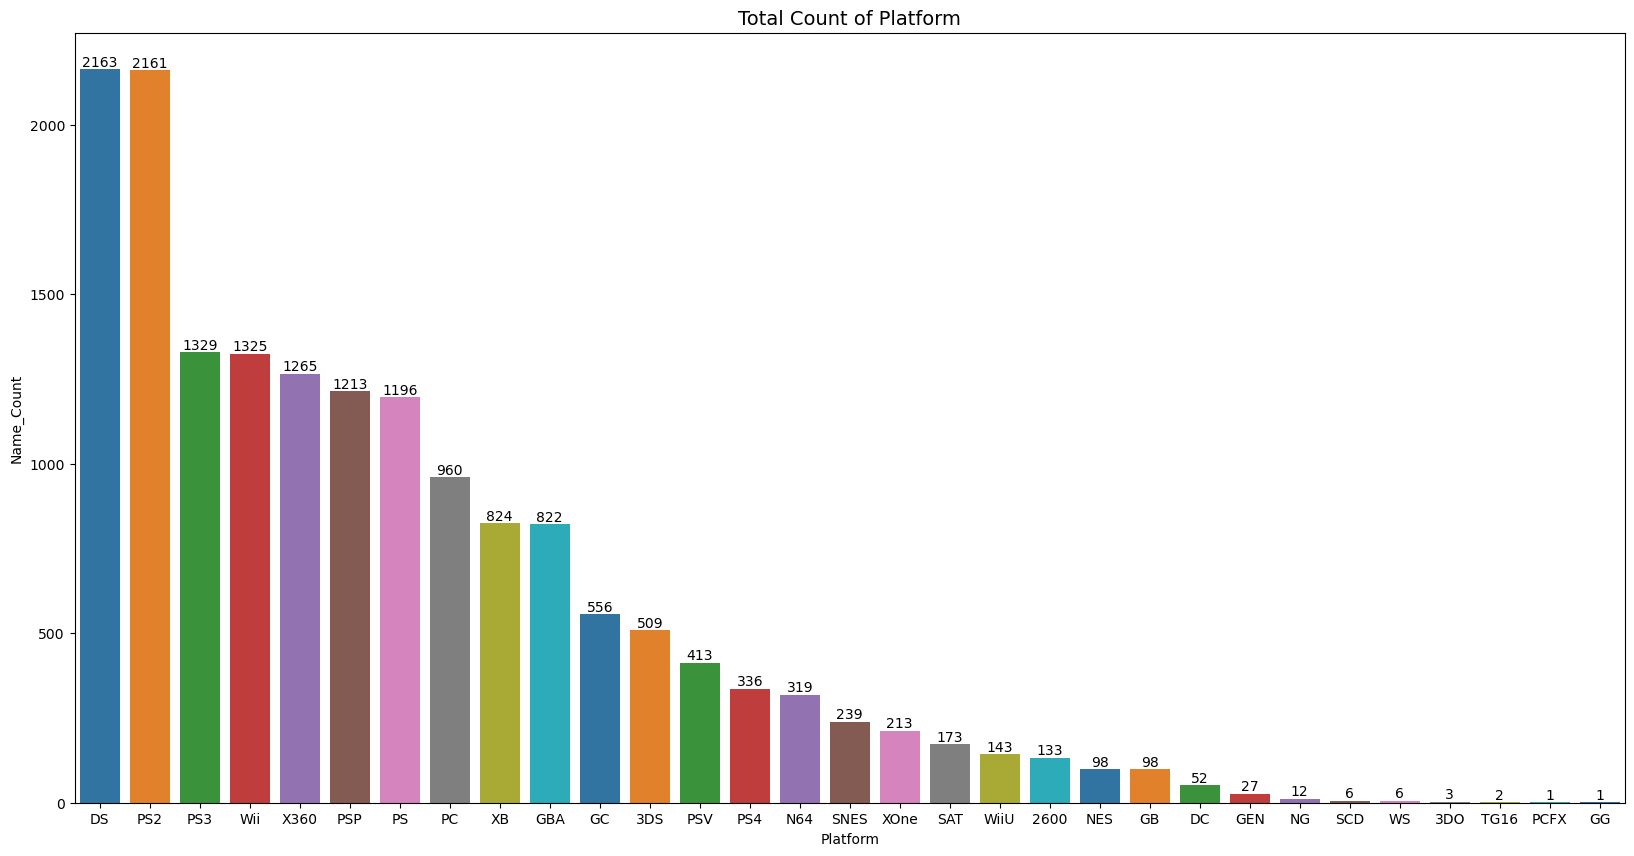

In [539]:
ax = sns.barplot(x='Platform',y='Name',data=df_plat,palette=sns.color_palette("tab10"))
for bars in ax.containers:
    ax.bar_label(bars)
ax.set_ylabel('Name_Count')
plt.title('Total Count of Platform', fontsize=14)
plt.show()

In [389]:
df.sample()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
13226,13228,Downtown no Gaki no Tsukai Yaarahen de!! Zetta...,3DS,2015,Action,Alchemist,0.0,0.0,0.05,0.0,0.05


In [523]:
# Calculating YoY Change in Global Sales

df_year = df.groupby('Year')['Global_Sales'].sum()
YoY_Change = df_year.pct_change() 
df2 = pd.DataFrame({'Year': df_year.index, 'Global_Sales': df_year.values, 'YoY_Change': YoY_Change.values}).sort_values(by='Year')
df2

,Year,Global_Sales,YoY_Change
0,1980,11.38,NaN
1,1981,35.77,2.143234
2,1982,28.86,-0.193179
3,1983,16.79,-0.418226
4,1984,50.36,1.999404
5,1985,53.94,0.071088
6,1986,37.07,-0.312755
7,1987,21.74,-0.413542
8,1988,47.22,1.172033
9,1989,73.45,0.555485


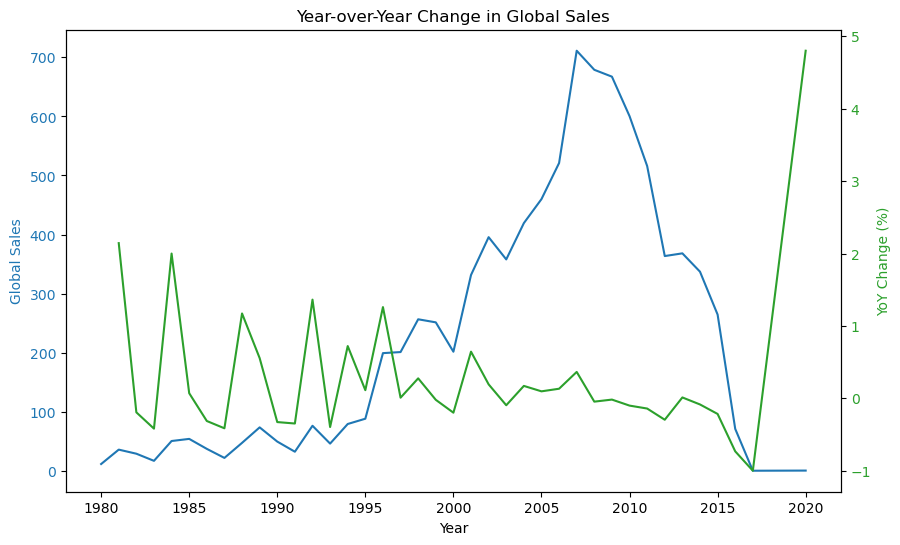

Global sales grew steadily until 2010, then dropped sharply, while the year-over-year change fluctuates significantly with high instability in earlier years and a steep rise after 2017


In [509]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Global Sales', color='tab:blue')
ax1.plot(df2['Year'], df2['Global_Sales'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('YoY Change (%)', color='tab:green')
ax2.plot(df2['Year'], df2['YoY_Change'], color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title('Year-over-Year Change in Global Sales')
plt.show()

print('Global sales grew steadily until 2010, then dropped sharply, while the year-over-year change fluctuates significantly with high instability in earlier years and a steep rise after 2017')


In [510]:
df_publisher=df.groupby('Publisher').agg({'NA_Sales':'sum','EU_Sales':'sum','JP_Sales':'sum','Other_Sales':'sum','Global_Sales':'sum'}).reset_index().sort_values(by='Global_Sales', ascending=False)
df_publisher

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
359,Nintendo,816.87,418.74,455.42,95.33,1786.56
138,Electronic Arts,595.07,371.27,14.04,129.77,1110.32
21,Activision,429.70,215.53,6.54,75.34,727.46
456,Sony Computer Entertainment,265.22,187.72,74.10,80.45,607.50
525,Ubisoft,253.43,163.32,7.50,50.26,474.72
...,...,...,...,...,...,...
375,Ongakukan,0.00,0.00,0.01,0.00,0.01
96,Commseed,0.00,0.00,0.01,0.00,0.01
495,Takuyo,0.00,0.00,0.01,0.00,0.01
76,Boost On,0.00,0.00,0.01,0.00,0.01


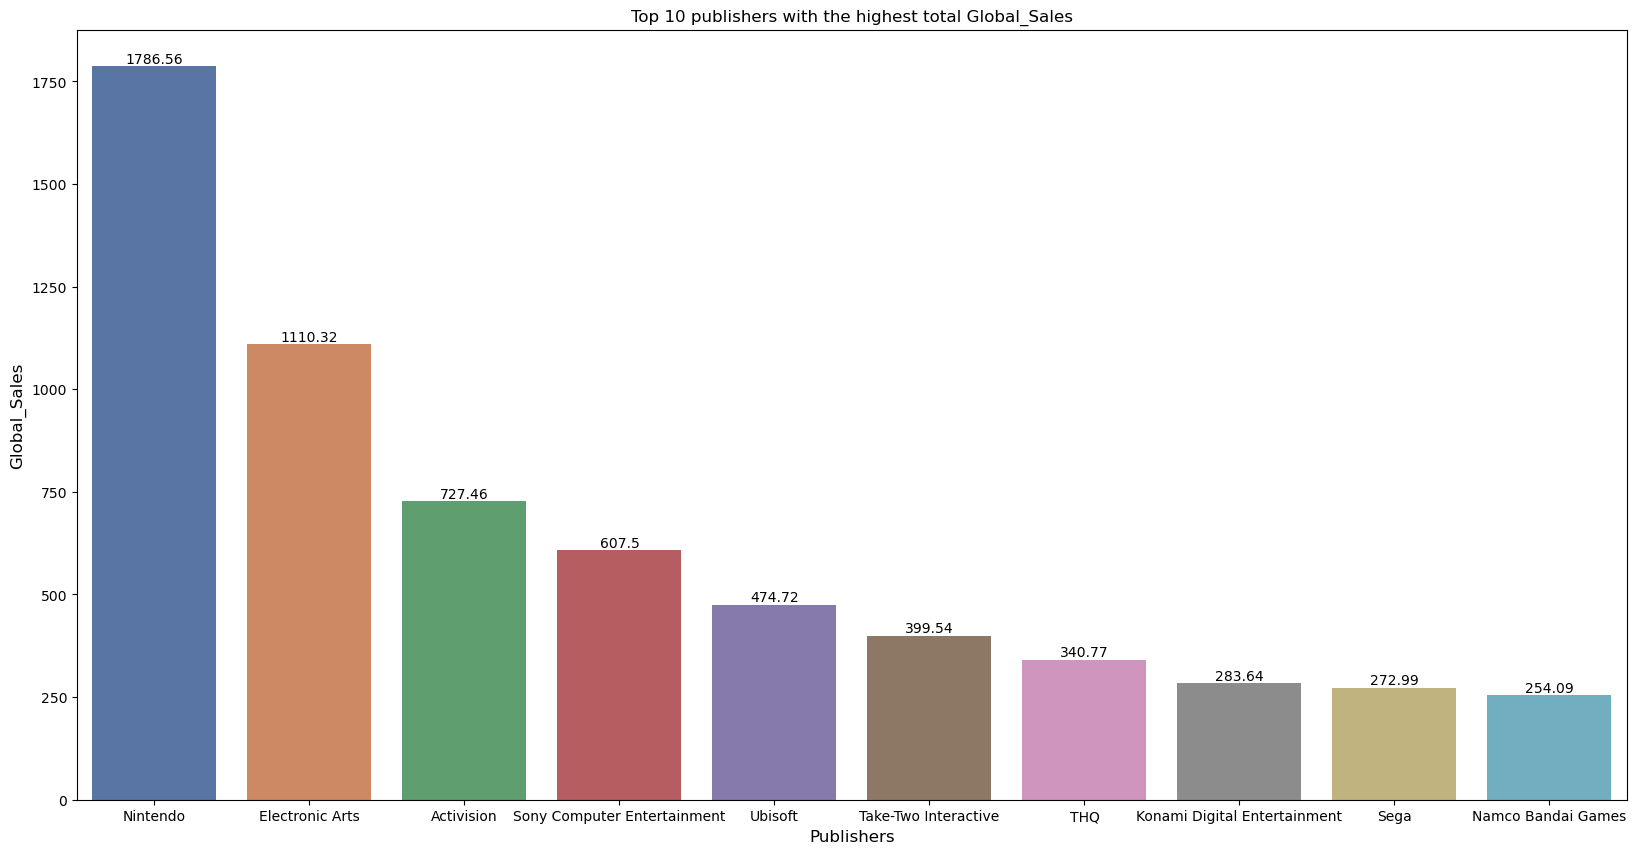

In [527]:
Global_Sales=df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
Global_Sales

ax = sns.barplot(data=Global_Sales, palette=sns.color_palette("deep"), errorbar=None)
for bars in ax.containers:
    ax.bar_label(bars)
ax.set_xlabel('Publishers',fontsize=12)    
ax.set_ylabel('Global_Sales', fontsize=12)
plt.title('Top 10 publishers with the highest total Global_Sales', fontsize=12)
plt.show()


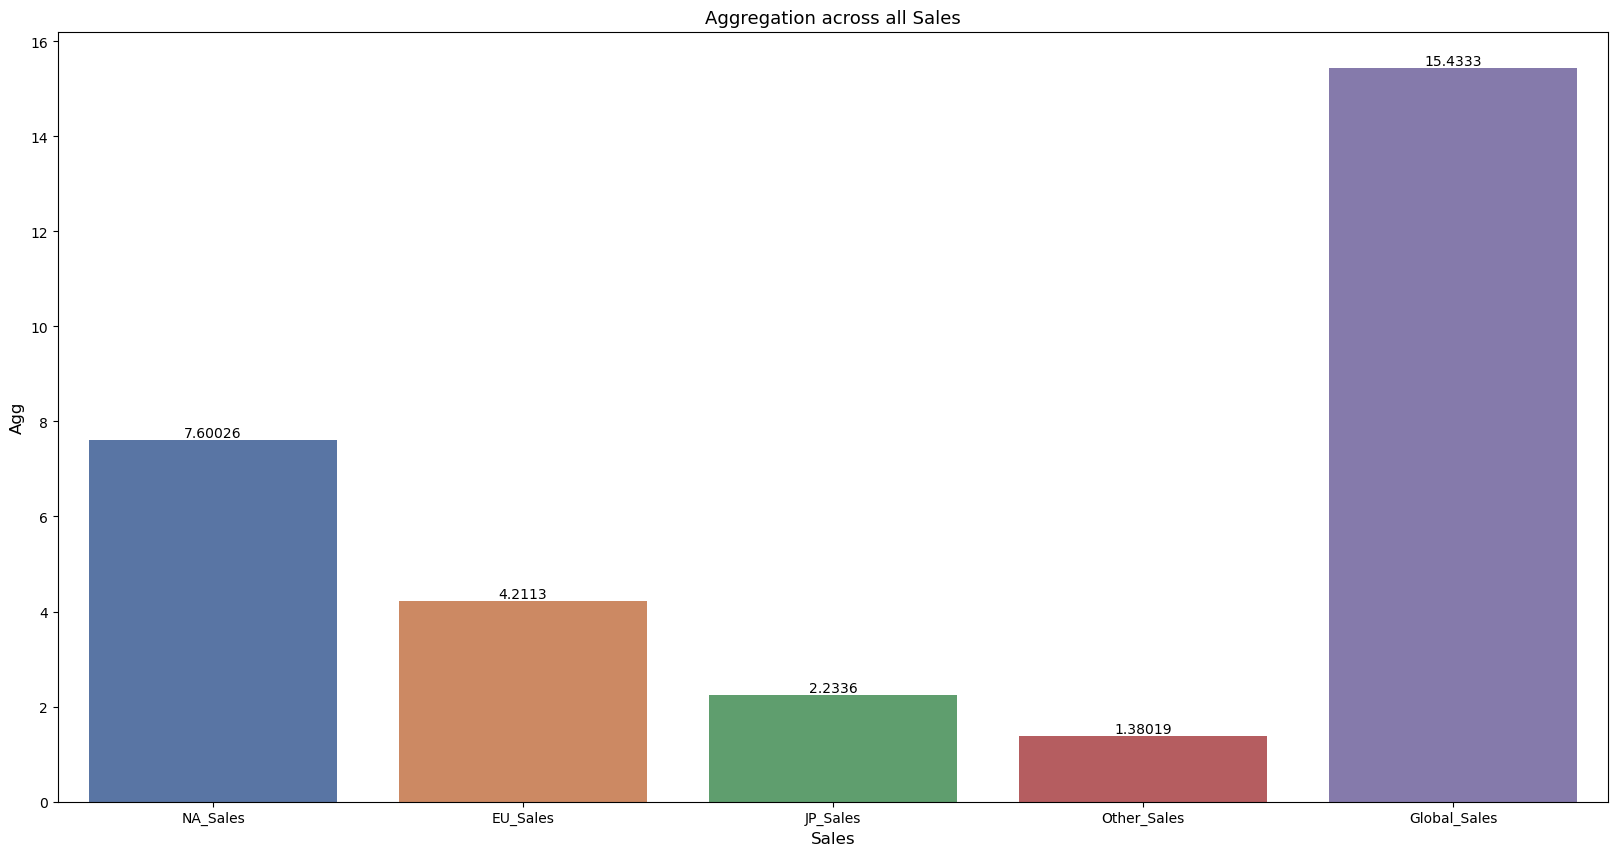

In [531]:
ax = sns.barplot(data=df_publisher, palette=sns.color_palette("deep"), errorbar=None)
for bars in ax.containers:
    ax.bar_label(bars)
ax.set_xlabel('Sales',fontsize=12)    
ax.set_ylabel('Agg', fontsize=12)
plt.title('Aggregation across all Sales', fontsize=13)
plt.show()